# Задача №5: Прогнозирование выживания пациентов с циррозом печени

## Описание задачи

Цирроз печени является серьезным состоянием, вызванным длительным повреждением печени и образованием обширных рубцовых тканей. Это часто происходит вследствие таких состояний, как гепатит или хроническое употребление алкоголя. Данный датасет основан на исследовании, проведенном Майской клиникой (Mayo Clinic) в период с 1974 по 1984 год.

 Ваша задача - создать модель машинного обучения для прогнозирования выживания пациентов с циррозом печени на основе имеющихся данных.

## ML задачи

- провести входной анализ данных (EDA)
- определить метрики для оценки эффективности модели
- сформировть baseline-модель
- предложить улучшенную модель и вывести ее в продакшн

## Описание датасета

Исследование включает информацию о пациентах, включая их пол, возраст и другие атрибуты - всего 17 признаков.
Дополнительные атрибуты включают данные об использовании лекарства D-penicillamine и исходе лечения.
Всего записей - 418.

## Ссылка на датасет

[dataset5.zip](./dataset5.zip) (11 KB)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Checkin' nulls...

In [ ]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

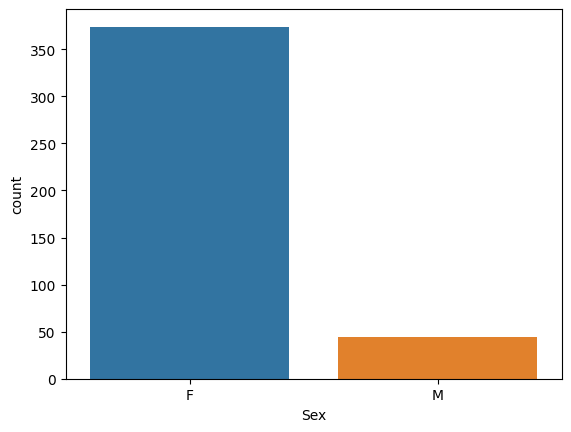

In [ ]:
sns.countplot(x='Sex', data=df, order = df['Sex'].value_counts().index)

<Axes: xlabel='Stage', ylabel='count'>

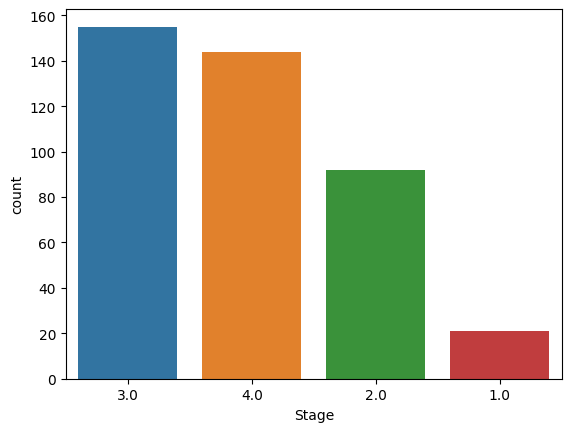

In [ ]:
sns.countplot(x='Stage', data=df, order = df['Stage'].value_counts().index)

<Axes: xlabel='Status', ylabel='count'>

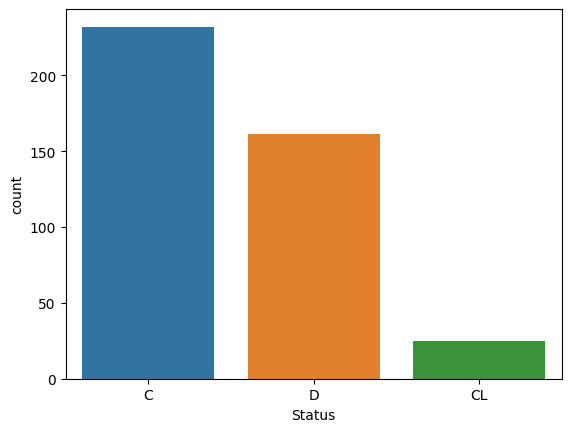

In [ ]:
sns.countplot(x='Status', data=df, order = df['Status'].value_counts().index)

array([[<Axes: title={'center': 'Bilirubin'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Copper'}>,
        <Axes: title={'center': 'Alk_Phos'}>,
        <Axes: title={'center': 'SGOT'}>],
       [<Axes: title={'center': 'Tryglicerides'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>],
       [<Axes: title={'center': 'Stage'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1000x800 with 0 Axes>

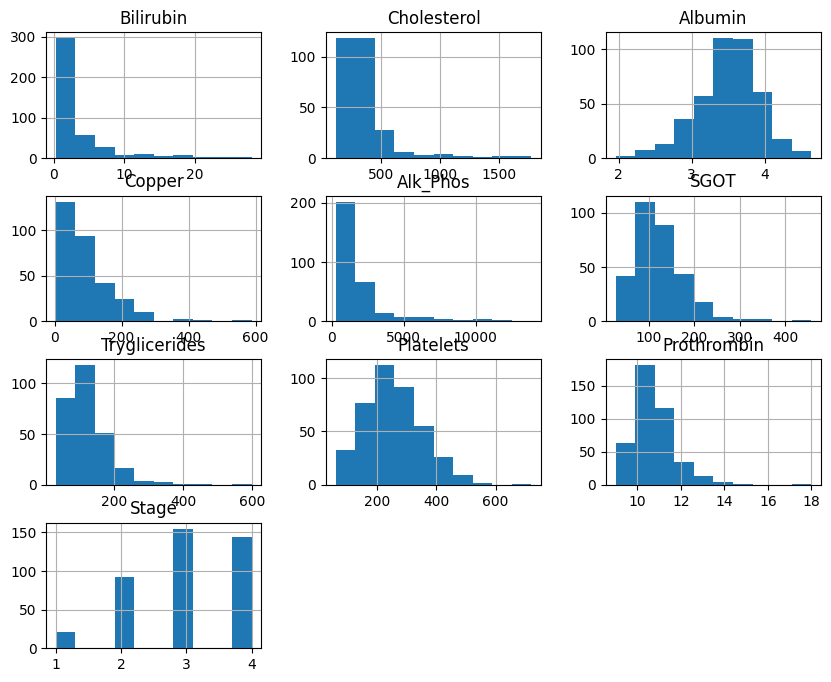

In [ ]:
plt.figure(figsize=(10,8))
df[df.dtypes[df.dtypes == float].index].hist(figsize=(10,8))

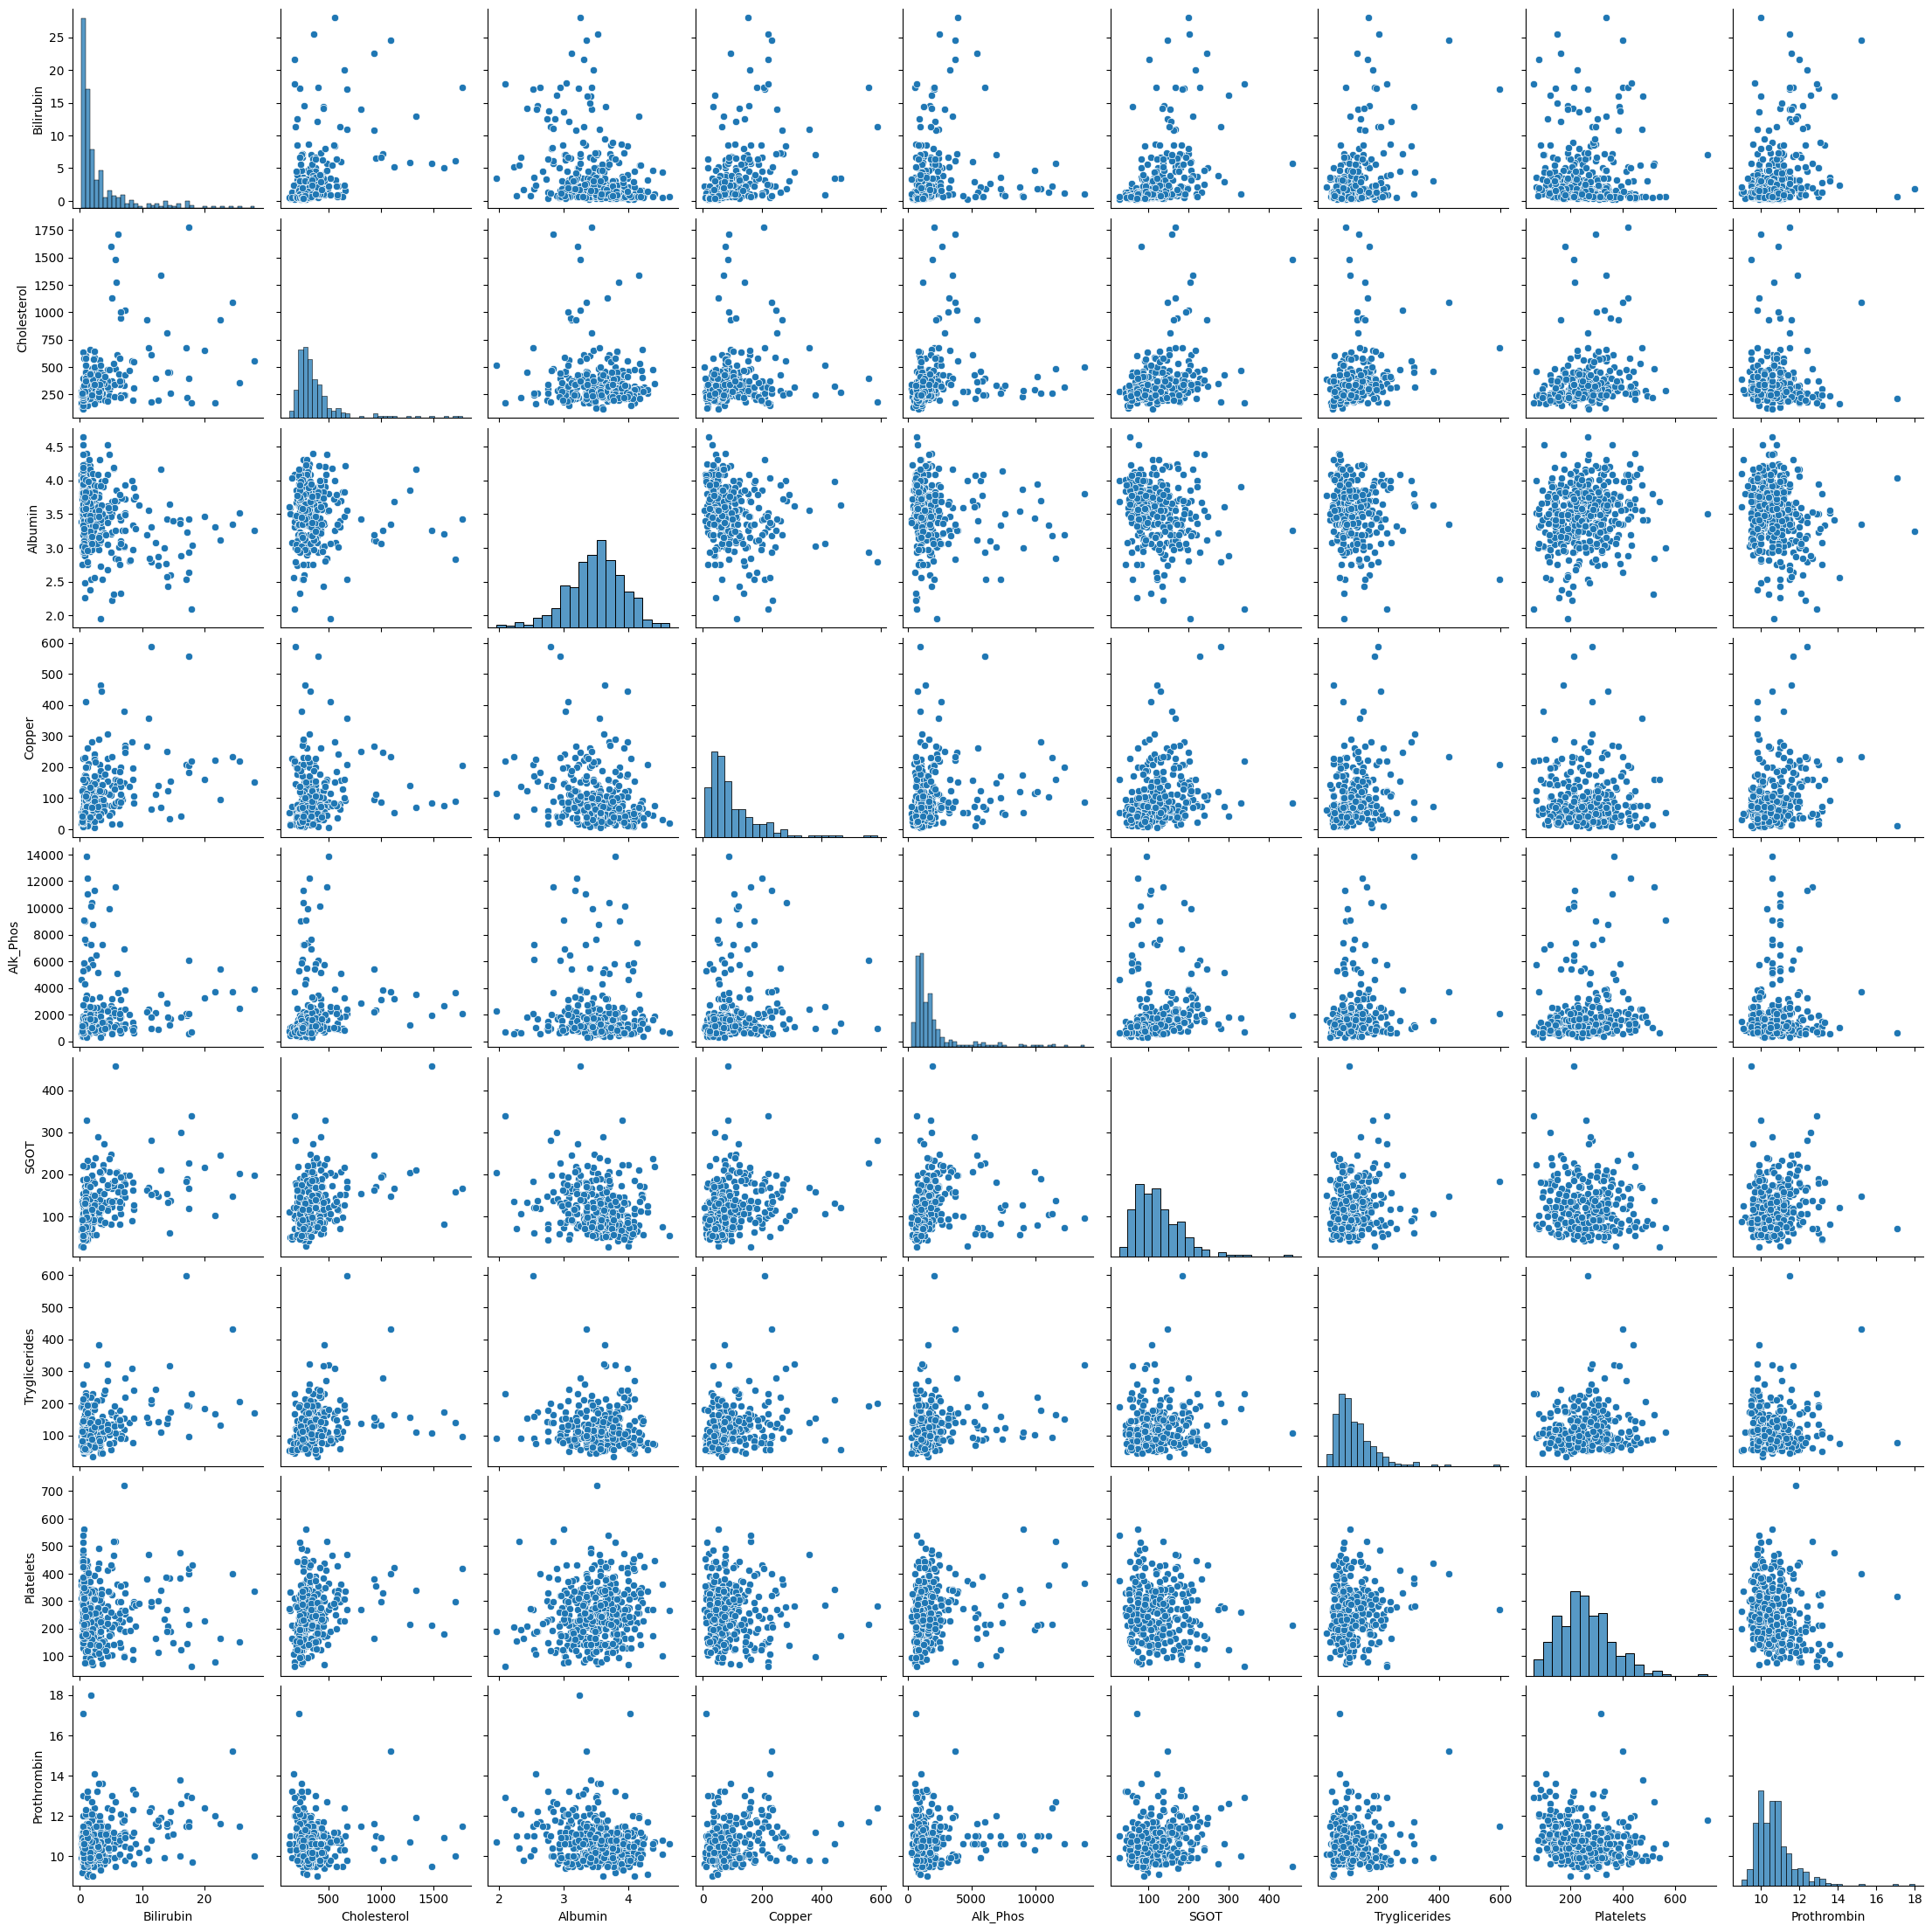

In [ ]:
sns.pairplot(df[df.dtypes[df.dtypes == float].index].drop('Stage', axis=1))

In [ ]:
corr = df.corr().sort_values('Stage', ascending = False)

# Top 10 correlations
pd.DataFrame(corr['Stage']) * 100

<ipython-input-14-888565855e99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().sort_values('Stage', ascending = False)


,Stage
Stage,100.000000
Copper,26.940044
Prothrombin,20.780167
Bilirubin,20.073063
Age,18.908336
SGOT,16.494461
Tryglicerides,12.389871
Alk_Phos,4.127320
Cholesterol,1.116420
ID,-3.375682


##Missing values fill

In [ ]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [ ]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

## Data preprocessing

In [ ]:
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})

In [ ]:
df['Age'] = df['Age'] / 365
df['N_Years'] = df['N_Days'] / 365

In [ ]:
X = df.drop(['Status', 'N_Days', 'ID', 'N_Years'], axis=1)
y = df['N_Years']

In [ ]:
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,58.805479,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,56.484932,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,0,70.120548,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,0,54.778082,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,38.131507,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Metric

Для оценки моделей используется R2 Score по следующим причинам:

- Интерпретируемость: R2 Score предоставляет интуитивно понятную меру объясненной дисперсии в данных.
- Устойчивость к смещению в данных: R2 Score устойчив к смещению в данных и остается полезным, даже если время до события (выживаемость) распределено неоднородно.
- В задачах, где целью является предсказание времени до события, важно, чтобы модель умела объяснять вариацию во времени. R2 Score измеряет, как много дисперсии в данных объяснено моделью.

Следует также рассмотреть другие метрики - Mean Absolute Error (MAE) и Root Mean Squared Error (RMSE), чтобы получить полное представление о качестве  модели.

## Model selection

In [ ]:
len(X), len(y)  # just checking

(418, 418)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4242)

### Linear Regression - **BASELINE MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

MAE: 1.91
RMSE: 2.50
R2 Score: 0.32


### Random Forest Regressor - **IMPROVED MODEL: v.1**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

improved_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
improved_model.fit(X_train, y_train)

y_pred_improved = improved_model.predict(X_test)

mae_improved = mean_absolute_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))
r2_improved = r2_score(y_test, y_pred_improved)

print(f'Improved Model MAE: {mae_improved:.2f}')
print(f'Improved Model RMSE: {rmse_improved:.2f}')
print(f'Improved Model R2 Score: {r2_improved:.2f}')

Improved Model MAE: 2.25
Improved Model RMSE: 2.93
Improved Model R2 Score: 0.06


RandomForestRegressor оказался значительно хуже линейной регрессии в данной задаче. Продолжим эксперименты

### XGBoost - **IMPROVED MODEL: v.2**

In [ ]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Model MAE: {mae_xgb:.2f}')
print(f'XGBoost Model RMSE: {rmse_xgb:.2f}')
print(f'XGBoost Model R2 Score: {r2_xgb:.2f}')

XGBoost Model MAE: 2.46
XGBoost Model RMSE: 3.14
XGBoost Model R2 Score: -0.08


### Lasso - **IMPROVED MODEL: v.3**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Model MAE: {mae_lasso:.2f}')
print(f'Lasso Model RMSE: {rmse_lasso:.2f}')
print(f'Lasso Model R2 Score: {r2_lasso:.2f}')


Lasso Model MAE: 1.90
Lasso Model RMSE: 2.49
Lasso Model R2 Score: 0.32


In [ ]:
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso(random_state=42)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

y_pred_lasso = grid_search.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Model MAE: {mae_lasso:.2f}')
print(f'Lasso Model RMSE: {rmse_lasso:.2f}')
print(f'Lasso Model R2 Score: {r2_lasso:.2f}')

Lasso Model MAE: 1.85
Lasso Model RMSE: 2.46
Lasso Model R2 Score: 0.34


In [ ]:
import joblib

joblib.dump(grid_search, 'lasso_model.pkl')

loaded_model = joblib.load('lasso_model.pkl')

In [ ]:
y_pred_lasso = loaded_model.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Model MAE: {mae_lasso:.2f}')
print(f'Lasso Model RMSE: {rmse_lasso:.2f}')
print(f'Lasso Model R2 Score: {r2_lasso:.2f}')

Lasso Model MAE: 1.85
Lasso Model RMSE: 2.46
Lasso Model R2 Score: 0.34


### NN - **IMPROVED MODEL: v.4**

In [ ]:
import tensorflow as tf


# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='linear', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1)
y_pred_nn = model.predict(X_test_scaled).flatten()


mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Improved Neural Network Model MAE: {mae_nn:.2f}')
print(f'Improved Neural Network Model RMSE: {rmse_nn:.2f}')
print(f'Improved Neural Network Model R2 Score: {r2_nn:.2f}')


Epoch 1/50
45/45 [==============================] - 1s 4ms/step - loss: 26.8572
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 14.4254
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 9.5228
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 7.4976
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 7.0290
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 6.9913
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 6.7493
Epoch 8/50
45/45 [==============================] - 0s 3ms/step - loss: 6.6668
Epoch 9/50
45/45 [==============================] - 0s 3ms/step - loss: 6.4865
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 6.5234
Epoch 11/50
45/45 [==============================] - 0s 2ms/step - loss: 6.4384
Epoch 12/50
45/45 [==============================] - 0s 2ms/step - loss: 6.5318
Epoch 13/50
45/45 [============================

Ridge - IMPROVED MODEL: v.5

In [ ]:
from sklearn.linear_model import Ridge

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_regression = Ridge()
hyperparameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor = GridSearchCV(ridge_regression, hyperparameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_regressor.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_ridge)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_lasso = r2_score(y_test, y_pred_ridge)

print(f'Lasso Model MAE: {mae_lasso:.2f}')
print(f'Lasso Model RMSE: {rmse_lasso:.2f}')
print(f'Lasso Model R2 Score: {r2_lasso:.2f}')

Lasso Model MAE: 1.90
Lasso Model RMSE: 2.49
Lasso Model R2 Score: 0.32


## Вывод: Lasso - наилучшая модель